In [0]:
#Demo of long distance problem using RNN (LSTM)

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, SimpleRNN, Flatten, GlobalMaxPooling1D,LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
sns.set()


In [0]:
#Creating Dataset
T=30
X=[]
Y=[]
D=1

def get_label(x,i1,i2,i3):
  if x[i1]<0 and  x[i2]<0 and x[i3]<0:
    return 1
  if x[i1]<0 and x[i2]>0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]<0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]>0 and x[i3]<0:
    return 1
  return 0

for t in range(5000):
  x=np.random.randn(T)
  X.append(x)
  #y=get_label(x,-1,-2,-3) # Short distance
  y=get_label(x,1,2,3) # long distance
  Y.append(y)

X=np.array(X)
Y=np.array(Y)
N=len(X)


In [75]:
# Testing our LSTM
inputs= np.expand_dims(X,-1)

#make the RNN
i=Input(shape=[T,D])
x=LSTM(5, return_sequences=True)(i)
x=GlobalMaxPooling1D()(x)
x=Dense(1, activation ='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r=model.fit(inputs,Y,epochs=200,validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 19ms/step - loss: 0.6949 - accuracy: 0.5092 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 2/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6942 - accuracy: 0.4932 - val_loss: 0.6940 - val_accuracy: 0.4972
Epoch 3/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.4924 - val_loss: 0.6928 - val_accuracy: 0.5184
Epoch 4/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.4936 - val_loss: 0.6943 - val_accuracy: 0.4972
Epoch 5/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6939 - accuracy: 0.4964 - val_loss: 0.6925 - val_accuracy: 0.5108
Epoch 6/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6918 - accuracy: 0.5072 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 7/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6922 - accuracy: 0.5060 - val_loss: 0.6903 - val_accuracy: 0.5220
Epoch 

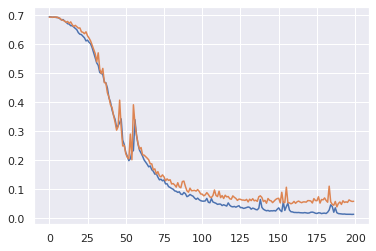

In [76]:
#Plotting Loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')

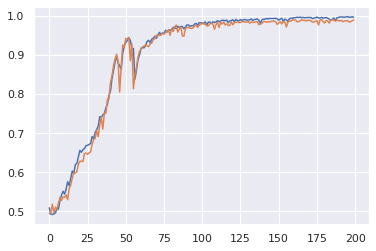

In [77]:
#Plotting Loss
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')